<a href="https://colab.research.google.com/github/RohitKumar23-11/Basic-TensorFlow/blob/main/02_neural_network_classification_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to neural network classification with TensorFlow

In this notebook we're going to learn how to write neural networks for classification problems.

A classification is where you try to classify something as one thing or another.

A few types of classification problems:
* Binary classification
* Multiclass classification
* Multilabel classification

## Creating data to view and fit

In [1]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [2]:
# Check out features
X[:10]

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       [-0.39373073,  0.69288277],
       [ 0.44220765, -0.89672343],
       [-0.47964637,  0.67643477],
       [-0.01364836,  0.80334872],
       [ 0.77151327,  0.14775959],
       [-0.16932234, -0.79345575],
       [-0.1214858 ,  1.02150905]])

In [3]:
# Check the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

Our data is a little hard to understand right now... let's visualize it.

In [4]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


In [5]:
circles["label"].value_counts()

1    500
0    500
Name: label, dtype: int64

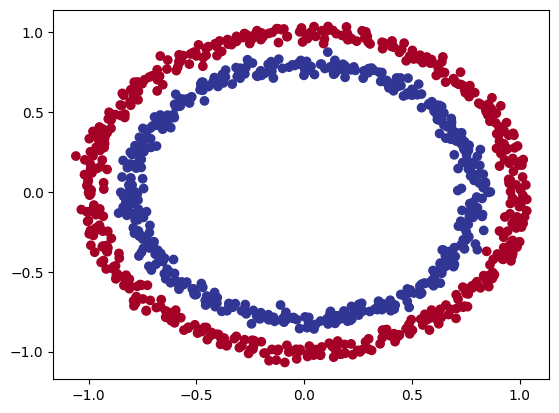

In [6]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

⚒ **Exercise:** Before pushing forward, spend few minutes playing around with [playground.tensorflow.org](https://playground.tensorflow.org/#activation=sigmoid&regularization=L1&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.003&regularizationRate=0.001&noise=0&networkShape=4,2&seed=0.25775&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false) byuilding and running different neural networks. See what happens when you change different hyperparameters.

## Input and output shapes

In [7]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [8]:
# How many samples we're working
len(X), len(y)

(1000, 1000)

In [9]:
# View the first examples of features and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modelling

The steps in modelling with TensorFlow are typically:

1. Create or import model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweak
6. Evaluate...

In [10]:
# Import TensorFlow
import tensorflow as tf
tf.__version__

'2.12.0'

In [11]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# 3. Fit the model
model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 5ms/step - loss: 1.3951 - accuracy: 0.4860
Epoch 2/5
32/32 [==============================] - 0s 4ms/step - loss: 0.7230 - accuracy: 0.4960
Epoch 3/5
32/32 [==============================] - 0s 3ms/step - loss: 0.7046 - accuracy: 0.4910
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6975 - accuracy: 0.4950
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6950 - accuracy: 0.4940


In [12]:
# Let's try and improve our model by training for longer
model_1.fit(X, y, epochs=200, verbose=0)

In [13]:
model_1.evaluate(X, y)

32/32 [==============================] - 0s 3ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

Since we're working on binary classification problem and our model is getting ~50% accuracy... it's performing as if it's guessing.

So let's step things up a notch and add an extra layer.

In [14]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create a model, this time 2 layers
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# 3. Fit the model
model_2.fit(X,y, epochs=100, verbose=0)

In [15]:
# 4. Evaluate the model
model_2.evaluate(X, y)

32/32 [==============================] - 0s 5ms/step - loss: 0.6932 - accuracy: 0.5000


[0.6932470798492432, 0.5]

In [16]:
circles['label'].value_counts()

1    500
0    500
Name: label, dtype: int64

In [17]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create a model, this time with activation and much neurons
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# 3. Fit the model
model_3.fit(X, y, epochs=100, verbose=0)

# 4. evaluate the model
model_3.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6780 - accuracy: 0.5490


[0.677972674369812, 0.5490000247955322]

## Improving our model

Let's look into our bag of tricks to see how we can improve our model.

1. Create a model - we might to add more layers or increase the number of hidden units within a layer.
2. Compiling a model - here we might to choose a different optimization function such as Adam instead of SGD.
3. Fitting a model - perhaps we might fit our model for more epochs (leave it training for longer).

In [18]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model (this time 3 layers)
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100), # add 100 dense neurons
    tf.keras.layers.Dense(10), # add another layer with 10 neurons
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 3. Fit the model
model_4.fit(X, y, epochs=100, verbose=0)

In [19]:
# 4. Evaluate the model
model_4.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6995 - accuracy: 0.5070


[0.6995431184768677, 0.5070000290870667]

To visulize our model's prediction, let's create a function `plot_decision_boundary()`, this function will:

* Take in a trained model, features (X) and labels (y)
* Create a meshgrid of the different X values
* Make predictions across the meshgrid
* Plot the predictions as well as a line between zones (where each unique calss falls)

In [20]:
import numpy as np

In [21]:
def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function is inspired by two resources.
  1. CS231n - https://cs231n.github.io/neural-networks-case-study/
  2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X values (we're going to make predictions on these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # Stack 2D arrays together

  # Make predictions
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1:
    print("doing multiclass classification")
    # We have to reshape our prediction to get them for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classification...")
    y_pred = np.round(y_pred).reshape(xx.shape)

  # plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 0s 1ms/step
doing binary classification...


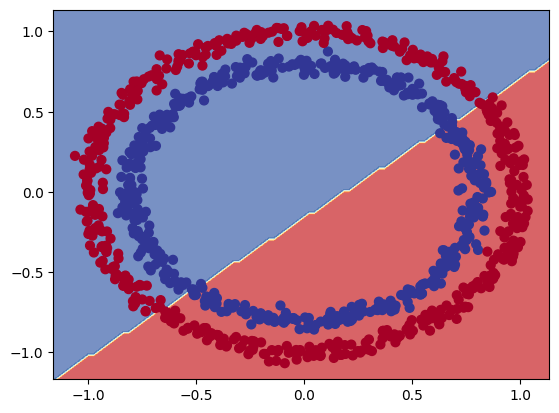

In [22]:
# Check out the predictions our model is making
plot_decision_boundary(model=model_4,
                       X=X,
                       y=y)

313/313 [==============================] - 0s 1ms/step
doing binary classification...


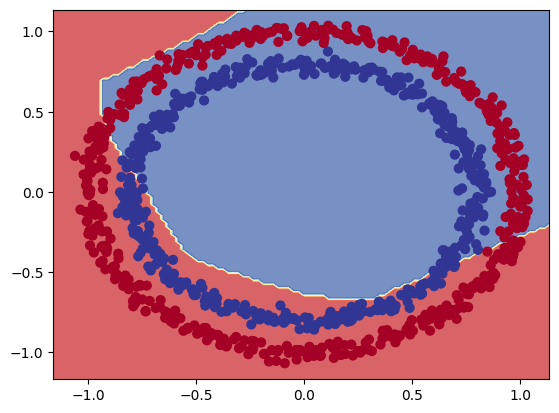

In [23]:
plot_decision_boundary(model=model_3,
                       X=X,
                       y=y)

In [24]:
# Let's see if our model can be used for a regression problem...

tf.random.set_seed(42)

# Create some regression data
X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5) # y = X + 100

# Split our regression data into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]

y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Fit our model to the regression data
model_4.fit(X_reg_train, y_reg_train, epochs=100)

Epoch 1/100


ValueError: ignored

Oh wait... we compiled our model for a binary classification problem.

But... we're now working on a regression problem, let's change the model to suit our data.

In [25]:
# Setup the random seed
tf.random.set_seed(42)

# 1. Create the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model, this time with a regression-specific loss function
model_4.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

# 3. Fit the model
#model_4.fit(X_reg_train, y_reg_train, epochs=100)
model_4.fit(tf.expand_dims(X_reg_train,axis=1),y_reg_train,epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 5ms/step - loss: 311.0679 - mae: 311.0679
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 178.7928 - mae: 178.7928
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 63.9221 - mae: 63.9221
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 76.9825 - mae: 76.9825
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 79.6117 - mae: 79.6117
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: 49.6211 - mae: 49.6211
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 48.0137 - mae: 48.0137
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: 42.2602 - mae: 42.2602
Epoch 9/100
5/5 [==============================] - 0s 3ms/step - loss: 44.2317 - mae: 44.2317
Epoch 10/100
5/5 [==============================] - 0s 3ms/step - loss: 42.4677 - mae: 42.4677
Epoch 11/100
5/5 [==============================] - 0s 

2/2 [==============================] - 0s 4ms/step


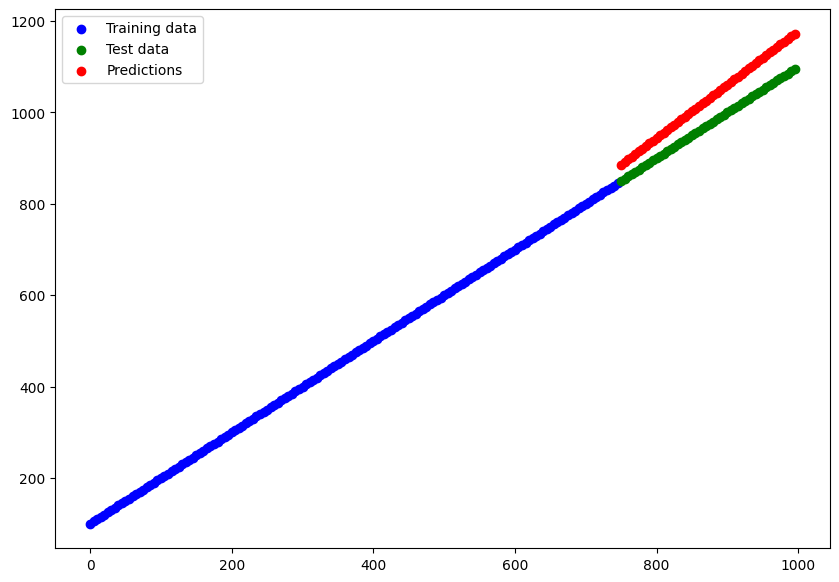

In [26]:
# Make prediction with our trained model
y_reg_preds = model_4.predict(X_reg_test)

# Plot the model's predictions against our regression data
plt.figure(figsize=(10,7))
plt.scatter(X_reg_train, y_reg_train, c="b", label="Training data")
plt.scatter(X_reg_test, y_reg_test, c='g', label="Test data")
plt.scatter(X_reg_test, y_reg_preds, c="r", label="Predictions")
plt.legend();

## The missing piece: Non-linearity

In [27]:
# set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
])

# 2. Compile the model
model_5.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

# 3. Fit the model
history = model_5.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 6.4006 - accuracy: 0.4860
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 6.4049 - accuracy: 0.4850
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 6.4044 - accuracy: 0.4850
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 6.4041 - accuracy: 0.4850
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 6.4038 - accuracy: 0.4850
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 6.4035 - accuracy: 0.4850
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 6.4031 - accuracy: 0.4850
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 6.4026 - accuracy: 0.4850
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 6.4023 - accuracy: 0.4850
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 6.4017 - accuracy: 0.4850
Epoch 11/

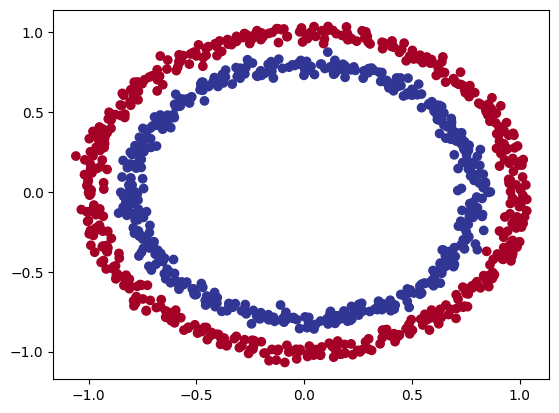

In [28]:
# Check out our data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

313/313 [==============================] - 0s 1ms/step
doing binary classification...


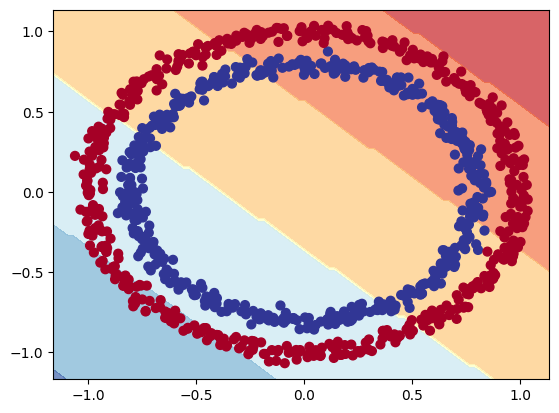

In [29]:
# Check the decision boundary for our latest model
plot_decision_boundary(model = model_5,
                       X=X,
                       y=y)

Let's try to build our first neural network with a non-linear activation function.

In [30]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model with a non-linear activation
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.relu)
])

# 2. Compile the model
model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

# 3. Fit the model
history = model_6.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 5.6807 - accuracy: 0.4860
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 5.6406 - accuracy: 0.4840
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 5.6349 - accuracy: 0.4840
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 5.6322 - accuracy: 0.4820
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 5.6299 - accuracy: 0.4810
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 5.6030 - accuracy: 0.4820
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 5.6049 - accuracy: 0.4830
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 5.5940 - accuracy: 0.4830
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 5.5821 - accuracy: 0.4820
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 5.5498 - accuracy: 0.4810
Epoch 11/

In [31]:
"""
# set random seed
tf.random.set_seed(42)

# 1. Build the model
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(8, tf.keras.activations.relu),
    tf.keras.layers.Dense(4, tf.keras.activations.relu),
    tf.keras.layers.Dense(1, tf.keras.activations.sigmoid)
])

# 2. Compile the model
model_7.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.003),
                metrics=["accuracy"])

# 3. Fit the model
model_7.fit(X, y, epochs=100)

#(It works good on tensorflow playground but not here I think)
"""

'\n# set random seed\ntf.random.set_seed(42)\n\n# 1. Build the model\nmodel_7 = tf.keras.Sequential([\n    tf.keras.layers.Dense(8, tf.keras.activations.relu),\n    tf.keras.layers.Dense(4, tf.keras.activations.relu),\n    tf.keras.layers.Dense(1, tf.keras.activations.sigmoid)\n])\n\n# 2. Compile the model\nmodel_7.compile(loss=tf.keras.losses.BinaryCrossentropy(),\n                optimizer=tf.keras.optimizers.Adam(lr=0.003),\n                metrics=["accuracy"])\n\n# 3. Fit the model\nmodel_7.fit(X, y, epochs=100)\n\n#(It works good on tensorflow playground but not here I think)\n'

In [32]:
# Time to replicate the multi-layer neural network from tensorflow playground in code...

# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_7.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

# 3. Fit the model
history = model_7.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 1.6538 - accuracy: 0.4320
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 1.2810 - accuracy: 0.4460
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 1.1986 - accuracy: 0.4520
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 1.1400 - accuracy: 0.4520
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0931 - accuracy: 0.4490
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0509 - accuracy: 0.4440
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0099 - accuracy: 0.4530
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.9619 - accuracy: 0.4590
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8935 - accuracy: 0.4490
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8296 - accuracy: 0.4260
Epoch 11/

In [33]:
# Evaluate the model
model_7.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.3563 - accuracy: 0.8890


[0.3563392162322998, 0.8889999985694885]

313/313 [==============================] - 1s 2ms/step
doing binary classification...


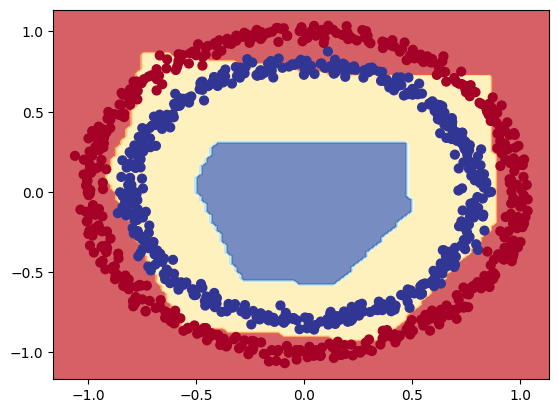

In [34]:
# How do our model prediction look?
plot_decision_boundary(model_7, X, y)

In [35]:
# Time to make a model with activation function on output layer also

# Set the random state
tf.random.set_seed(42)

# 1. Build the model
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile the model
model_8.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(0.001),
                metrics=["accuracy"])

# 3. Fit the model
history = model_8.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 0.7532 - accuracy: 0.4970
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7369 - accuracy: 0.4970
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7262 - accuracy: 0.4820
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7192 - accuracy: 0.4720
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7143 - accuracy: 0.4830
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7108 - accuracy: 0.4900
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7080 - accuracy: 0.4820
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7055 - accuracy: 0.4850
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7035 - accuracy: 0.4820
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7017 - accuracy: 0.4810
Epoch 11/

In [36]:
# 4. Evaluate our model
model_8.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.2582 - accuracy: 0.9840


[0.258204847574234, 0.984000027179718]

313/313 [==============================] - 0s 1ms/step
doing binary classification...


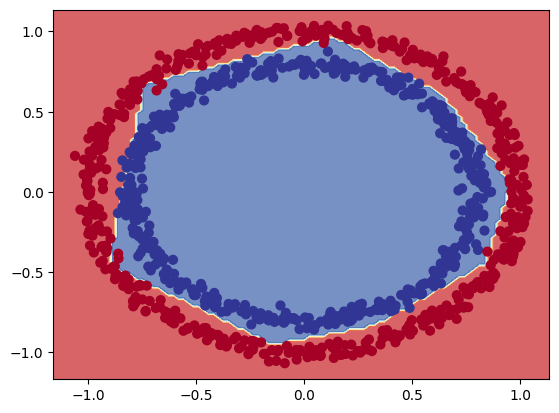

In [37]:
# Let's visualize our incredible metrics
plot_decision_boundary(model_8, X, y)

🤔 **Question:** What's wrong the predictions we've made? Are we really evaluating our model correctly? Hint: what data did the model learn on and waht data did we predict on?

**Answer:** The training and testing data are same so we are basically testing our model on data which it previously see. Therefore the our model is evaluating incorrectly.

🔑**Note:** The combination of **linear (straight lines) and non-linear (non-straight lines) functions** is one of the key fundamentals of neural networks.

Now we've discussed the concept of linear and non-linear functions (or lines), let's see them in action.

In [38]:
# Create a toy a tensor (similar to the data we pass into our model)
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

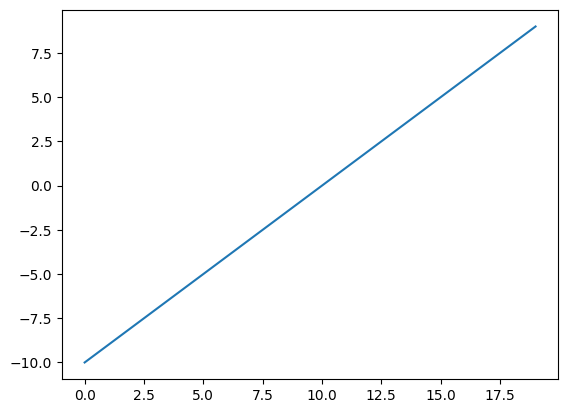

In [39]:
# Visualize our toy tensor
plt.plot(A)

In [40]:
# Let's start by replication sigmoid - sigmoid(x) = 1 / (1 + exp(-x))
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

# Use the sigmoid function on our toy tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

In [41]:
tf.keras.activations.sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397868e-05, 1.2339458e-04, 3.3535014e-04, 9.1105123e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425877e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079709e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752736e-01, 9.9908894e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

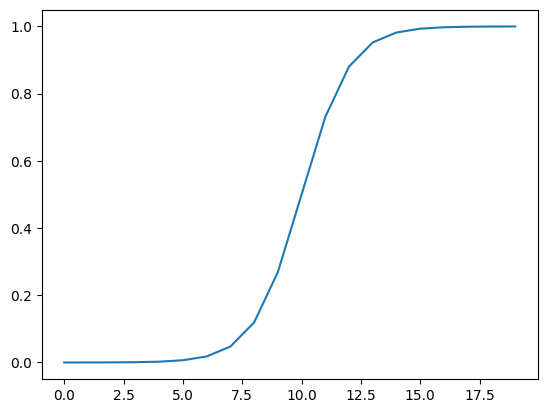

In [42]:
# Plot our toy tensor transformed by sigmoid
plt.plot(sigmoid(A));

In [43]:
# Let's recreate the relu function
def relu(x):
  return tf.maximum(0, x)

# Pass our toy tensor to our custom relu function
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

In [44]:
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

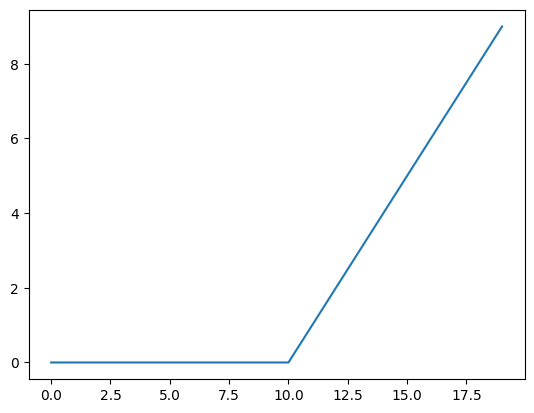

In [45]:
# Plot ReLU-modified tensor
plt.plot(relu(A))

In [46]:
# Let's try the linear activation function
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

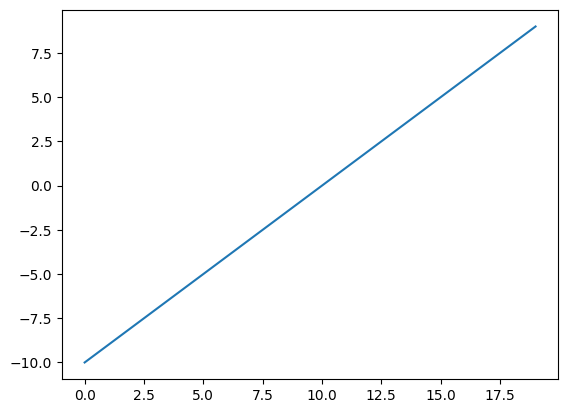

In [47]:
# Does the linear acitvation function change anything?
plt.plot(tf.keras.activations.linear(A))

In [48]:
A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

## Evaluating and improving our classification

So far we've been training and testing on the same dataset...

However, in machine learning this is basically a sin.

So let's create a training and test set.

In [49]:
# Check how many examples we have
len(X)

1000

In [50]:
# Split into train and test sets
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [51]:
# Let's recreate a model to fit on the training data and evaluate on the testing data

# Set random seed
tf.random.set_seed(42)

# 1. Create the model (same as model_8)
model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, tf.keras.activations.sigmoid)
])

# 2. Compile the model
model_9.compile(loss=tf.keras.losses.BinaryCrossentropy(), #loss="binary_crossentropy"
                optimizer=tf.keras.optimizers.Adam(lr=0.01),
                metrics=["accuracy"])

# 3. Fit the model
history = model_9.fit(X_train, y_train, epochs=100)

Epoch 1/100
25/25 [==============================] - 1s 3ms/step - loss: 0.7409 - accuracy: 0.4963
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7298 - accuracy: 0.4988
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7223 - accuracy: 0.4938
Epoch 4/100
25/25 [==============================] - 0s 4ms/step - loss: 0.7171 - accuracy: 0.4938
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7133 - accuracy: 0.4825
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7107 - accuracy: 0.4812
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7084 - accuracy: 0.4700
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7067 - accuracy: 0.4638
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7053 - accuracy: 0.4588
Epoch 10/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7042 - accuracy: 0.4175
Epoch 11/

In [52]:
"""
# Set random seed
tf.random.set_seed(42)

# 1. Create the model (same as model_9 but different argumenr style)
model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile the model
model_9.compile(loss="binary_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(lr=0.01),
                 metrics=["accuracy"])

# 3. Fit the model
history = model_9.fit(X_train, y_train, epochs=100)
"""

'\n# Set random seed\ntf.random.set_seed(42)\n\n# 1. Create the model (same as model_9 but different argumenr style)\nmodel_9 = tf.keras.Sequential([\n    tf.keras.layers.Dense(4, activation="relu"),\n    tf.keras.layers.Dense(4, activation="relu"),\n    tf.keras.layers.Dense(1, activation="sigmoid")\n])\n\n# 2. Compile the model\nmodel_9.compile(loss="binary_crossentropy",\n                 optimizer=tf.keras.optimizers.Adam(lr=0.01),\n                 metrics=["accuracy"])\n\n# 3. Fit the model\nhistory = model_9.fit(X_train, y_train, epochs=100)\n'

In [53]:
# 4. Evaluate the model on the test dataset
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 5ms/step - loss: 0.2567 - accuracy: 0.9750


[0.2567155361175537, 0.9750000238418579]

313/313 [==============================] - 1s 2ms/step
doing binary classification...
313/313 [==============================] - 0s 1ms/step
doing binary classification...


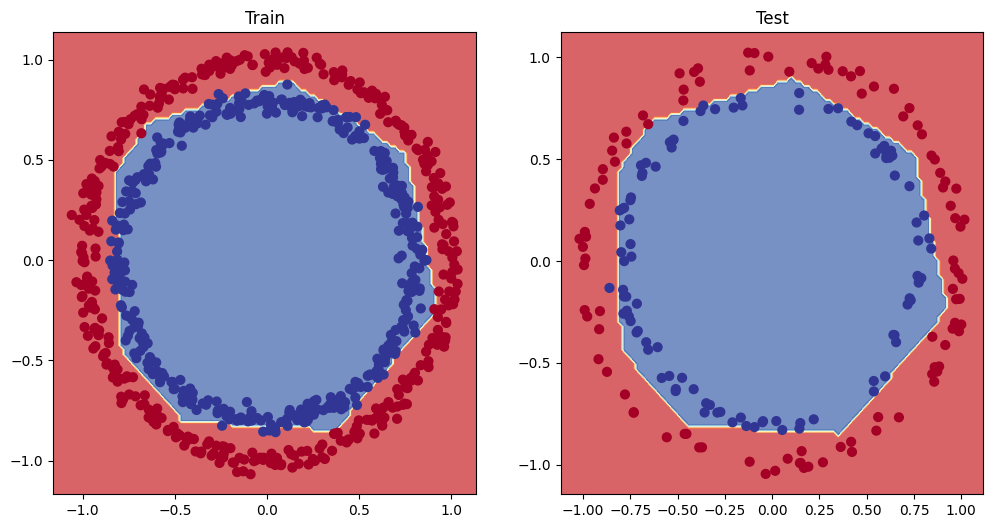

In [54]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_9, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_9, X=X_test, y=y_test)
plt.show();

## Plot the loss (or training) curves

In [55]:
# COnvert the history object into a DataFrame
pd.DataFrame(history.history)

,loss,accuracy
0,0.740927,0.49625
1,0.729769,0.49875
2,0.722305,0.49375
3,0.717105,0.49375
4,0.713283,0.48250
...,...,...
95,0.456733,0.94625
96,0.451103,0.95000
97,0.443899,0.95750
98,0.437887,0.96250


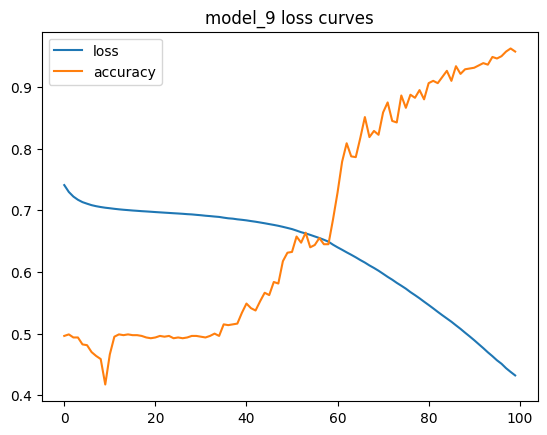

In [56]:
# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("model_9 loss curves");

🔑 **Note:** For many problems, the loss function foing down means the model is improving (the predictions it making are getting closer to the ground truth labels).

## Finding the best learning rate

To find the ideal learning rate (the learning rate where the loss decrease the most during training) we're going to use the flowwing steps:
* A learning rate **callback** - you can think of a callback as an extra piece of functionality, you can add to your *while* its training.
* Another model (we could use the same one as above, but we're practicing building models here)
* A modified loss curves plot.

In [57]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model
model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. compile the model
model_10.compile(loss="binary_crossentropy",
                 optimizer="Adam",
                 metrics=["accuracy"])

# 3. Create a learning rate callback
lr_schedular = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# 4. Fit the model (passing the lr_scheduler callback)
history_10 = model_10.fit(X_train,
                          y_train,
                          epochs=100,
                          callbacks=[lr_schedular])

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.6944 - accuracy: 0.5100 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6942 - accuracy: 0.5113 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6941 - accuracy: 0.5113 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6939 - accuracy: 0.5100 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6937 - accuracy: 0.5125 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5100 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.5063 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.5038 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss:

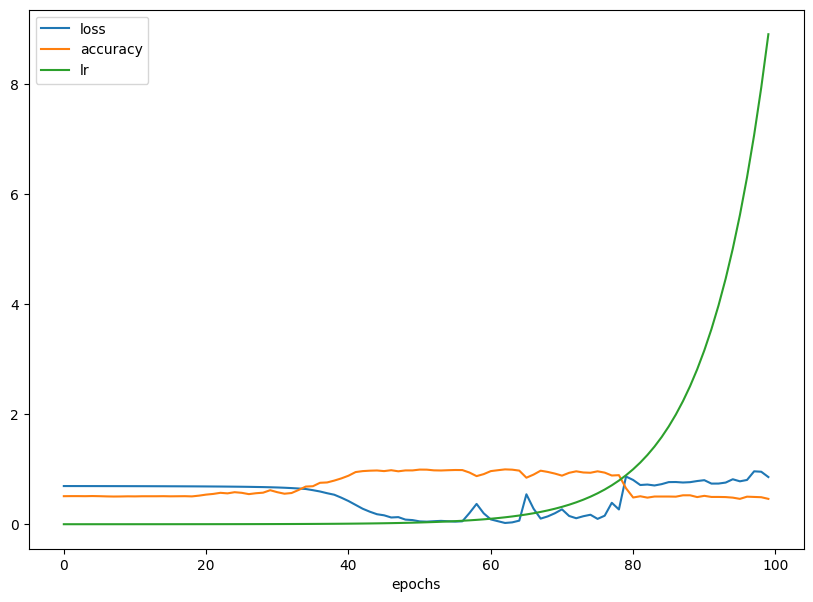

In [58]:
# Checkout history
pd.DataFrame(history_10.history).plot(figsize=(10, 7), xlabel="epochs");

Text(0.5, 1.0, 'Learning rate vs Loss')

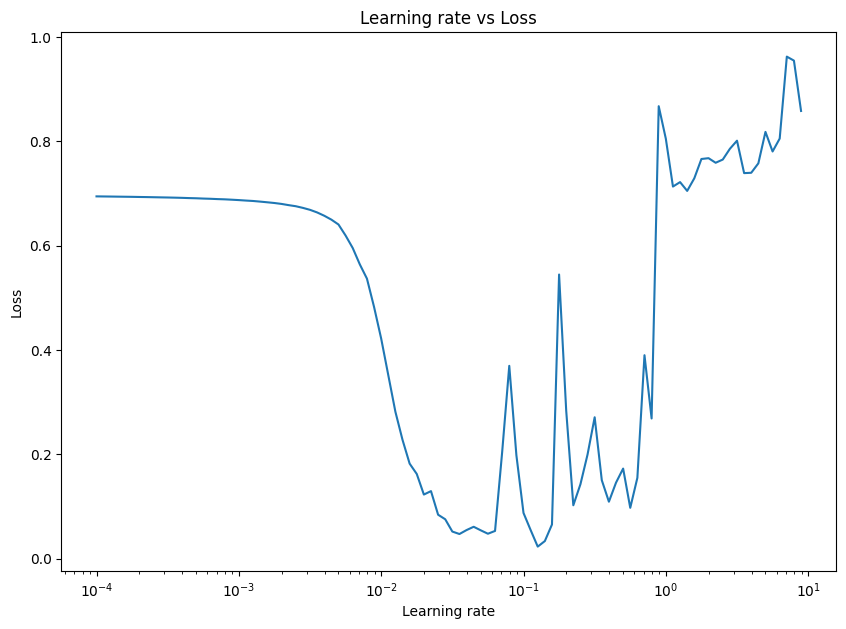

In [59]:
# Plot the learning rate versus the loss
lrs = 1e-4 * (10 ** (tf.range(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history_10.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Learning rate vs Loss")

In [60]:
len(lrs)

100

In [61]:
# Example of other typical learning rates values:
10**0, 10**-1, 10**-2, 10**-3, 1e-4

(1, 0.1, 0.01, 0.001, 0.0001)

In [62]:
# Let's try using a higher *ideal* learning rate with the same model

# Set random set
tf.random.set_seed(42)

# Build the model
model_11 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# compile the model with the ideal learning rate
model_11.compile(loss="binary_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(lr=0.02),
                 metrics=["accuracy"])

# Fit the model
history_11 = model_11.fit(X_train, y_train, epochs=100)

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.7002 - accuracy: 0.4888
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6983 - accuracy: 0.5038
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6967 - accuracy: 0.5050
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6954 - accuracy: 0.5063
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6942 - accuracy: 0.5138
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.5150
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6917 - accuracy: 0.5213
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6909 - accuracy: 0.5200
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6897 - accuracy: 0.5238
Epoch 10/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6886 - accuracy: 0.5337
Epoch 11/

In [63]:
# Let's try using a higher *ideal* learning rate with the same model

# Set random set
tf.random.set_seed(42)

# Build the model
model_12 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# compile the model with the ideal learning rate
model_12.compile(loss="binary_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(lr=0.025),
                 metrics=["accuracy"])

# Fit the model
history_12 = model_12.fit(X_train, y_train, epochs=100)

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.6866 - accuracy: 0.5063
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6850 - accuracy: 0.5175
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6839 - accuracy: 0.5288
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6830 - accuracy: 0.5362
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6824 - accuracy: 0.5600
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6817 - accuracy: 0.5562
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6808 - accuracy: 0.5575
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6803 - accuracy: 0.5638
Epoch 9/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6796 - accuracy: 0.5663
Epoch 10/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6788 - accuracy: 0.5638
Epoch 11/

In [64]:
# Evaluate model_11 and model_12 on the test dataset
model_11.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.2989 - accuracy: 0.9900


[0.2988915741443634, 0.9900000095367432]

In [65]:
model_12.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.4851 - accuracy: 0.9200


[0.4850669503211975, 0.9200000166893005]

In [66]:
# Evaluate the model_9 on the test dataset
model_9.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.4294 - accuracy: 0.9950


[0.42940735816955566, 0.9950000047683716]

313/313 [==============================] - 0s 1ms/step
doing binary classification...
313/313 [==============================] - 0s 1ms/step
doing binary classification...


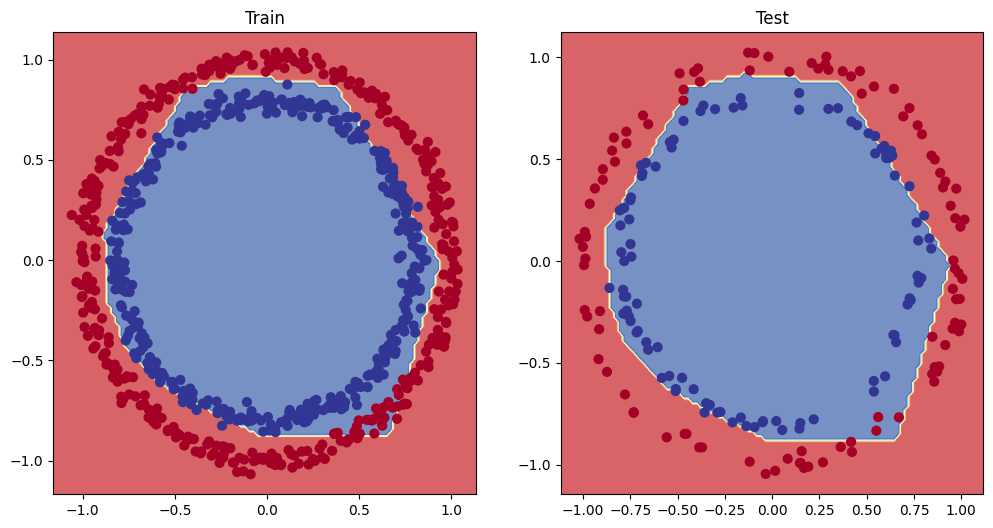

In [67]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_12, X=X_train, y=y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_12, X=X_test, y=y_test)
plt.show();

313/313 [==============================] - 0s 1ms/step
doing binary classification...
313/313 [==============================] - 0s 1ms/step
doing binary classification...


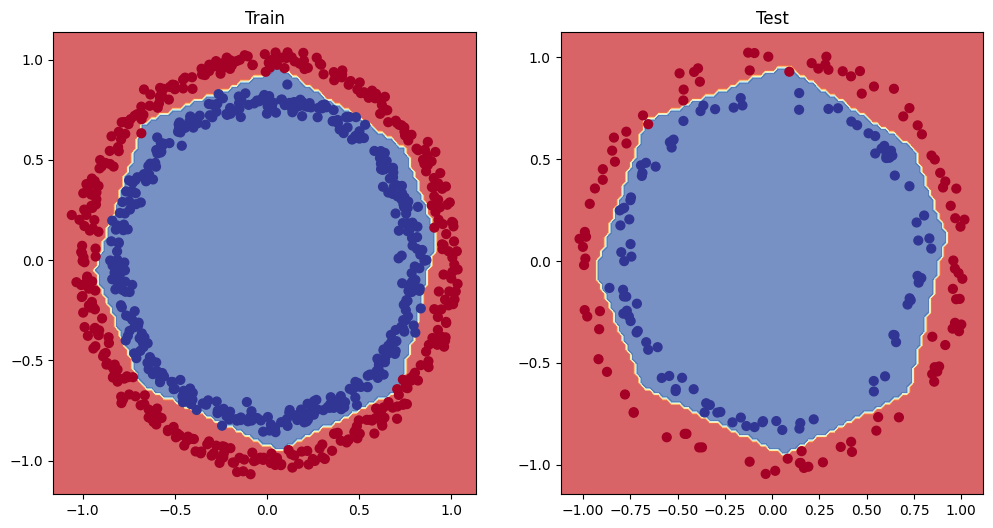

In [68]:
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_11, X=X_train, y=y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_11, X=X_test, y=y_test)
plt.show();

313/313 [==============================] - 0s 1ms/step
doing binary classification...
313/313 [==============================] - 0s 1ms/step
doing binary classification...


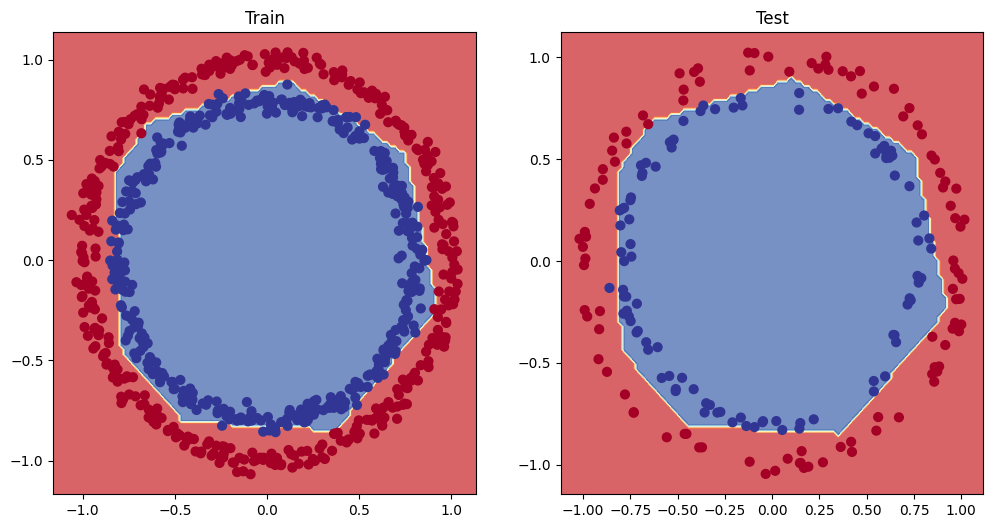

In [69]:
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_9, X=X_train, y=y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_9, X=X_test, y=y_test)
plt.show();

## More classification evaluation methods

ALongside visualizing our models results as much as possible, there are a handful of other classification evaluation methods & metrics you should be familier with:

* Accuracy
* Precision
* Recall
* F1-score
* Confusion metrix
* Classification report (from scikit-learn) - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

In [70]:
# Check the accuracy of our model
loss, accuracy = model_12.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {(accuracy*100):.2f}%")

7/7 [==============================] - 0s 2ms/step - loss: 0.4851 - accuracy: 0.9200
Model loss on the test set: 0.4850669503211975
Model accuracy on the test set: 92.00%


How about a confusion matrix?

In [71]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix

# Make predictions
y_preds = model_12.predict(X_test)

# Create confusion matrix
confusion_matrix(y_test, y_preds)

7/7 [==============================] - 0s 2ms/step


ValueError: ignored

In [72]:
y_test[:10]

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0])

In [73]:
y_preds[:10]

array([[0.48431152],
       [0.6950901 ],
       [0.5905588 ],
       [0.64226687],
       [0.4146932 ],
       [0.33368963],
       [0.5040333 ],
       [0.42979658],
       [0.5588707 ],
       [0.23846303]], dtype=float32)

Oops.. looks like our predictions array has come out in **prediction probability** form... the standard output from the sigmoid (or softmax) activation functions

In [74]:
# Convert prediction probabilities to binary format and view the first 10
tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [75]:
# Create a confusion matrix
confusion_matrix(y_test, tf.round(y_preds))

array([[97,  4],
       [12, 87]])

How about we prettify our confusion matrix?

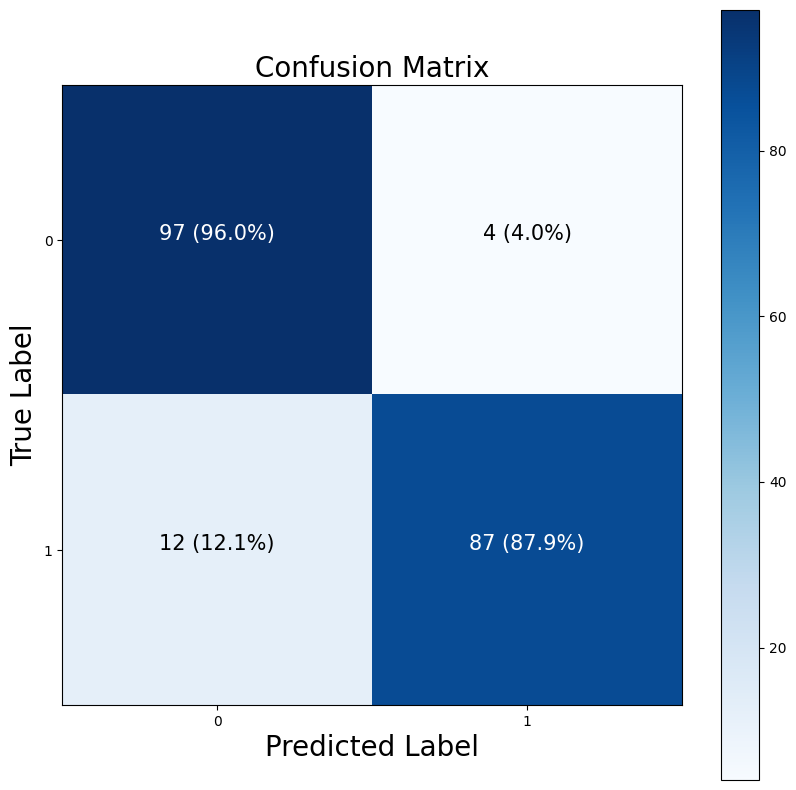

In [76]:
# Note: the confusion matrix code we're about to write is a remix of scikit-learn's plot_confusion_matrix
# https://github.com/scikit-learn/scikit-learn/blob/baf828ca1/sklearn/metrics/_plot/confusion_matrix.py#L443

import itertools

figsize = (10, 10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalzie our confusion matrix
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted Label",
       ylabel="True Label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set the x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)

In [77]:
cm_norm

array([[0.96039604, 0.03960396],
       [0.12121212, 0.87878788]])

In [78]:
cm.shape[0]

2

# Working with a larger example (multiclass classification)

When you have more than 2 classes as an option, it's known as **mutli-class classification**.

* This means if you have 3 different classes, it's multi-class classification.
* It also means if you have 100 different classes, it's multi-class classification.

To practice multi-class classification, we're going to build a neural network to classify images of different items of clothing.

In [79]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [81]:
# Show the first training example
print(f"Training sample:\n{train_data[0]}\n")
print(f"Training label:\n{train_labels[0]}\n")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [82]:
# Check the shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

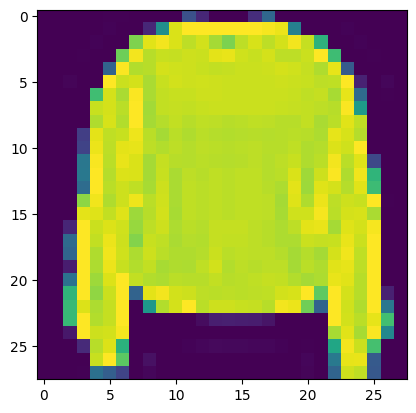

In [84]:
# plot a single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[7]);

In [85]:
# Check out samples label
train_labels[7]

2

In [86]:
# Create a small list so we can index onto our training labels so they're human-readable

In [87]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

len(class_names)

10

Text(0.5, 1.0, 'T-shirt/top')

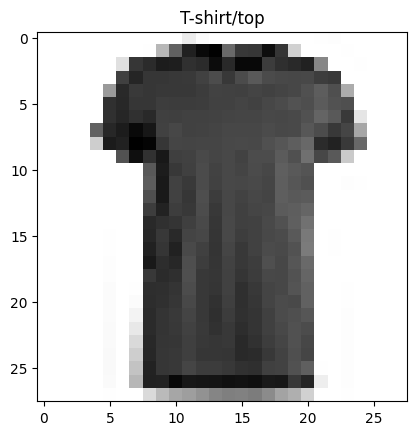

In [88]:
# Plot an example image and its label
index_of_choice=17
plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

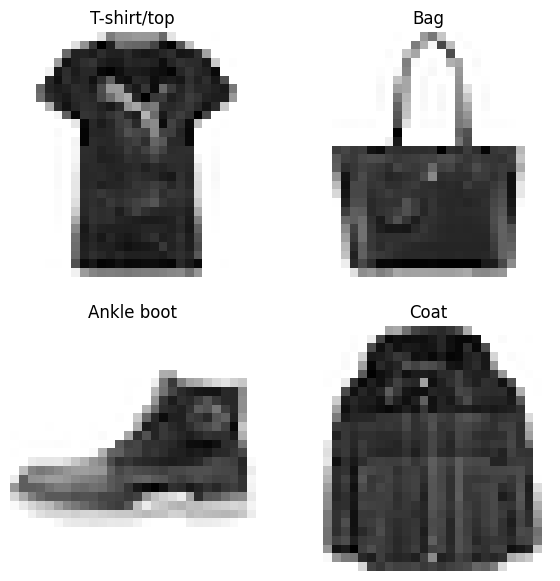

In [98]:
# Plot multiple random images of fashion MNIST
import random
plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

## Building a multi-class classification model

For our multi-class classification model, we can use a similar architecture to our binary classifiers, however, we're going to have to tweak a few things:
* Input shape = 28 x 28 (the shape of one image)
* Output shape = 10 (one per class of clothing)
* Loss function = tf.keras.losses.CategoricalCrossentropy()
  * If ypur labels are one-hot encoded, use CategoricalCrossentropy()
  * If your model are integer form use SparseCategoricalCrossentropy()
* Output layer activation = Softmax (not sigmoid)

In [102]:
# Our data needs to be flattened (from 28*28 to None, 784)
flatten_model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28, 28))])
flatten_model.output_shape

(None, 784)

In [105]:
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [107]:
tf.one_hot(train_labels[:10], depth=10)

<tf.Tensor: shape=(10, 10), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)>

In [106]:
# Set random set
tf.random.set_seed(42)

# 1. Create the model
model_13 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, tf.keras.activations.softmax)
])

# 2. Compile the model
model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# 3. Fit the model
non_norm_history = model_13.fit(train_data,
                                train_labels,
                                epochs=10,
                                validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3340 - accuracy: 0.0991 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3028 - accuracy: 0.0983 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3027 - accuracy: 0.1002 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.0975 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3028 - accuracy: 0.0973 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3028 - accuracy: 0.0992 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.0987 - val_loss: 2.3026 - val_accuracy:

In [112]:
# set random seed
tf.random.set_seed(42)

# 1. Build the model
model_14 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, tf.keras.activations.softmax)
])

# 2. Compile the mode
model_14.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 3. Fit the model
non_norm_history_1 = model_14.fit(train_data,
             tf.one_hot(train_labels, depth=10),
             epochs=10,
             validation_data=(test_data,
             tf.one_hot(test_labels, depth=10)))

Epoch 1/10
1875/1875 [==============================] - 6s 2ms/step - loss: 2.2263 - accuracy: 0.1495 - val_loss: 1.8623 - val_accuracy: 0.1918
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7586 - accuracy: 0.2436 - val_loss: 1.7015 - val_accuracy: 0.2777
Epoch 3/10
1875/1875 [==============================] - 8s 5ms/step - loss: 1.6745 - accuracy: 0.2831 - val_loss: 1.6618 - val_accuracy: 0.2848
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.6371 - accuracy: 0.2861 - val_loss: 1.6409 - val_accuracy: 0.2825
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.6234 - accuracy: 0.2846 - val_loss: 1.6187 - val_accuracy: 0.2893
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 1.6110 - accuracy: 0.2873 - val_loss: 1.5999 - val_accuracy: 0.2916
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.6017 - accuracy: 0.2888 - val_loss: 1.6045 - val_accuracy:

In [113]:
# Check the model summary
model_13.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_40 (Dense)            (None, 4)                 3140      
                                                                 
 dense_41 (Dense)            (None, 4)                 20        
                                                                 
 dense_42 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [114]:
# Check the min and max values of the training data
train_data.min(), train_data.max()

(0, 255)

Neural networks prefer data to be scaled (or normalized), this means they like to have the numbers in the tensors they try to find patterns between 0 and 1.

In [116]:
 # We can get our training and testing data between 0 and 1 by dividing by the maximum t
 train_data_norm = train_data / 255.0
 test_data_norm = test_data / 255.0

 # Check the min and max values of the scaled training data
 train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [118]:
# Now our data is normalized, let's build a model to find patterns in it

# Set random seed
tf.random.set_seed(42)

# 1. Build the model
model_15 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# 2. Compile the model
model_15.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# 3. Fit the model
norm_history = model_15.fit(train_data_norm,
                            train_labels,
                            epochs=10,
                            validation_data=(test_data_norm,
                                             test_labels))

Epoch 1/10
1875/1875 [==============================] - 6s 2ms/step - loss: 1.3621 - accuracy: 0.5126 - val_loss: 0.9054 - val_accuracy: 0.6710
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7778 - accuracy: 0.7253 - val_loss: 0.7533 - val_accuracy: 0.7218
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6956 - accuracy: 0.7454 - val_loss: 0.7103 - val_accuracy: 0.7275
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6667 - accuracy: 0.7558 - val_loss: 0.6826 - val_accuracy: 0.7513
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6494 - accuracy: 0.7636 - val_loss: 0.6667 - val_accuracy: 0.7618
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6332 - accuracy: 0.7715 - val_loss: 0.6843 - val_accuracy: 0.7659
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6152 - accuracy: 0.7842 - val_loss: 0.6563 - val_accuracy:

🔑 **Note:** Neural networks tend to prefer data in numerical form as well as scaled/normalized (numbers between 0 & 1).

<Axes: title={'center': 'Normalized-data'}>

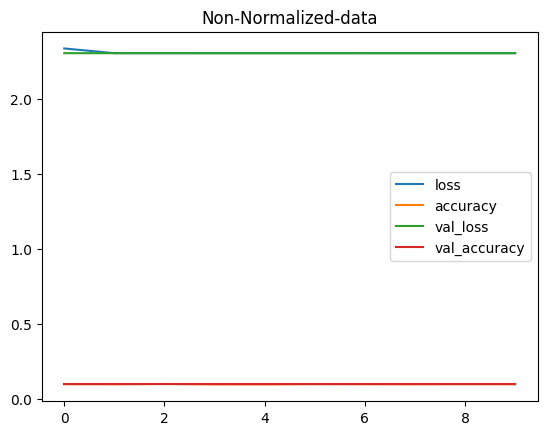

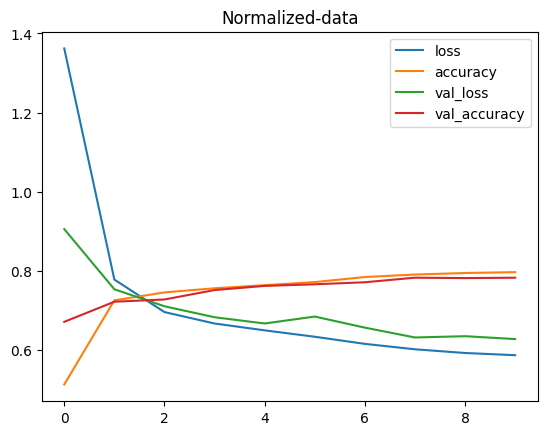

In [120]:
import pandas as pd

# Plot non-normalized data loss curves
pd.DataFrame(non_norm_history.history).plot(title="Non-Normalized-data")
# Plot normalized data loss curves
pd.DataFrame(norm_history.history).plot(title="Normalized-data")

> 🔑 **Note:** The same model with even *slightly* different data can produce *dramatically* different results. SO when you're comparing models, it's important to make sure your're comparing them on the same criteria (e.g., same architecture but different data or same data but different architecture).

In [123]:
## Finding the ideal learning rate

# Set random seed
tf.random.set_seed(42)

# Create model
model_16 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model
model_16.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Fit the model
find_lr_history = model_16.fit(train_data_norm,
                               train_labels,
                               epochs=40,
                               validation_data=(test_data_norm, test_labels),
                               callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 7s 3ms/step - loss: 1.2259 - accuracy: 0.5404 - val_loss: 0.8941 - val_accuracy: 0.6821 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.8104 - accuracy: 0.6977 - val_loss: 0.8061 - val_accuracy: 0.6800 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7338 - accuracy: 0.7187 - val_loss: 0.7398 - val_accuracy: 0.7185 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7022 - accuracy: 0.7330 - val_loss: 0.7216 - val_accuracy: 0.7296 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6836 - accuracy: 0.7433 - val_loss: 0.7126 - val_accuracy: 0.7434 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6691 - accuracy: 0.7532 - val_loss: 0.7226 - val_accuracy: 0.7359 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 5s

Text(0.5, 1.0, 'Finding the ideal learning rate')

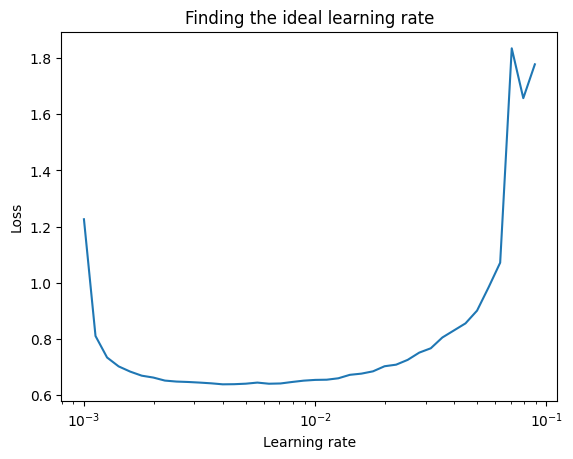

In [124]:
# Plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs, find_lr_history.history['loss'])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate")

In [147]:
# Let's refit the model with ideal learning rate

# Set random seed
tf.random.set_seed(42)

# Create the model
model_17 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model
model_17.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(lr=0.001),
                 metrics=["accuracy"])

# Fit the model
history_17 = model_17.fit(train_data_norm,
                          train_labels,
                          epochs=20,
                          validation_data=(test_data_norm,
                                           test_labels))

Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 1.3979 - accuracy: 0.4424 - val_loss: 1.0510 - val_accuracy: 0.6095
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8063 - accuracy: 0.7240 - val_loss: 0.7289 - val_accuracy: 0.7567
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6710 - accuracy: 0.7707 - val_loss: 0.6693 - val_accuracy: 0.7721
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6294 - accuracy: 0.7829 - val_loss: 0.6364 - val_accuracy: 0.7828
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6061 - accuracy: 0.7904 - val_loss: 0.6545 - val_accuracy: 0.7740
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5898 - accuracy: 0.7944 - val_loss: 0.6106 - val_accuracy: 0.7891
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5807 - accuracy: 0.7978 - val_loss: 0.6357 - val_accuracy:

## Evaluating our multi-class classification model

To evaluate our multi-class classification model we could:
* Evaluate its performance using other classification metrics (such as a confusion matrix)
* Assess some of its predictions (through visulizations)
* Imporve its results (by training it for longer or changing the architecture)
* Save and export it for use in applications

Let's go through the top 2...

In [126]:
# Create the confusion matrix

# Note: the confusion matrix code we're about to write is a remix of scikit-learn's plot_confusion_matrix
# https://github.com/scikit-learn/scikit-learn/blob/baf828ca1/sklearn/metrics/_plot/confusion_matrix.py#L443

import itertools
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
  # Create the confusion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalzie our confusion matrix
  n_classes = cm.shape[0]

  # Let's prettify it
  fig, ax = plt.subplots(figsize=figsize)
  # Create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  # Set lebels to be classes
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
        xlabel="Predicted Label",
        ylabel="True Label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

  # Set the x-axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Adjust label size
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  # Set threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i, j] > threshold else "black",
            size=text_size)

In [127]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [131]:
# Make some predictions with our model
y_probs = model_17.predict(test_data_norm) # probs is short for "prediction probabilities"

# View the first 5 predictions
y_probs[:5]

313/313 [==============================] - 0s 1ms/step


array([[8.8195937e-14, 2.4343066e-11, 2.0484637e-31, 2.0285050e-10,
        7.6787027e-18, 1.1762861e-01, 1.9828516e-15, 5.3395536e-02,
        2.4602155e-03, 8.2651561e-01],
       [5.0745334e-04, 1.6117555e-06, 7.3665553e-01, 3.7013644e-03,
        1.7489095e-01, 2.9943357e-11, 8.4197886e-02, 4.9357084e-13,
        4.5302946e-05, 1.1204616e-09],
       [8.8078582e-07, 9.9939573e-01, 2.4065005e-27, 6.0296623e-04,
        3.0442197e-16, 1.3702327e-17, 7.7393680e-15, 3.2146281e-07,
        2.4140651e-14, 2.1051386e-11],
       [1.5658019e-08, 9.9927902e-01, 2.5898935e-32, 7.2101533e-04,
        5.3930865e-18, 4.3500698e-22, 2.8438019e-17, 1.1146436e-09,
        3.3094951e-16, 6.6332719e-13],
       [1.0906190e-01, 2.9862701e-04, 5.1609147e-01, 1.0710960e-02,
        2.2089504e-02, 7.9267738e-05, 3.3959833e-01, 1.9592496e-06,
        2.0653917e-03, 2.7108672e-06]], dtype=float32)

> 🔑**Note:** Remember to make predictions on the same kind of data your model was trained on (e.g. if your model was trained on normalized data, you'll want to make predictions on normalized data).

In [136]:
y_probs[0], tf.argmax(y_probs[0]), class_names[tf.argmax(y_probs[0])]

(array([8.8195937e-14, 2.4343066e-11, 2.0484637e-31, 2.0285050e-10,
        7.6787027e-18, 1.1762861e-01, 1.9828516e-15, 5.3395536e-02,
        2.4602155e-03, 8.2651561e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=9>,
 'Ankle boot')

In [137]:
# Convert all of the prediction probabilities into integers
y_preds = y_probs.argmax(axis=1)

# View the first 10 prediction labels
y_preds[:10]

array([9, 2, 1, 1, 2, 1, 6, 6, 5, 7])

In [128]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [141]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels,
                 y_pred=y_preds)

array([[816,   2,  12,  80,   3,   7,  70,   0,  10,   0],
       [ 16, 904,   5,  64,   2,   0,   8,   0,   1,   0],
       [ 35,   1, 689,  15, 122,   0, 134,   0,   4,   0],
       [ 71,  14,   8, 831,  17,   1,  50,   0,   8,   0],
       [  2,   0, 109,  66, 677,   0, 135,   0,  11,   0],
       [  1,   0,   0,   1,   0, 882,   0,  62,  16,  38],
       [212,   0, 105,  57, 151,   7, 453,   0,  15,   0],
       [  0,   0,   0,   0,   0,  32,   0, 914,   0,  54],
       [  7,   0,   3,   7,   5,   8,  39,   3, 924,   4],
       [  0,   0,   0,   0,   0,  20,   0,  47,   3, 930]])

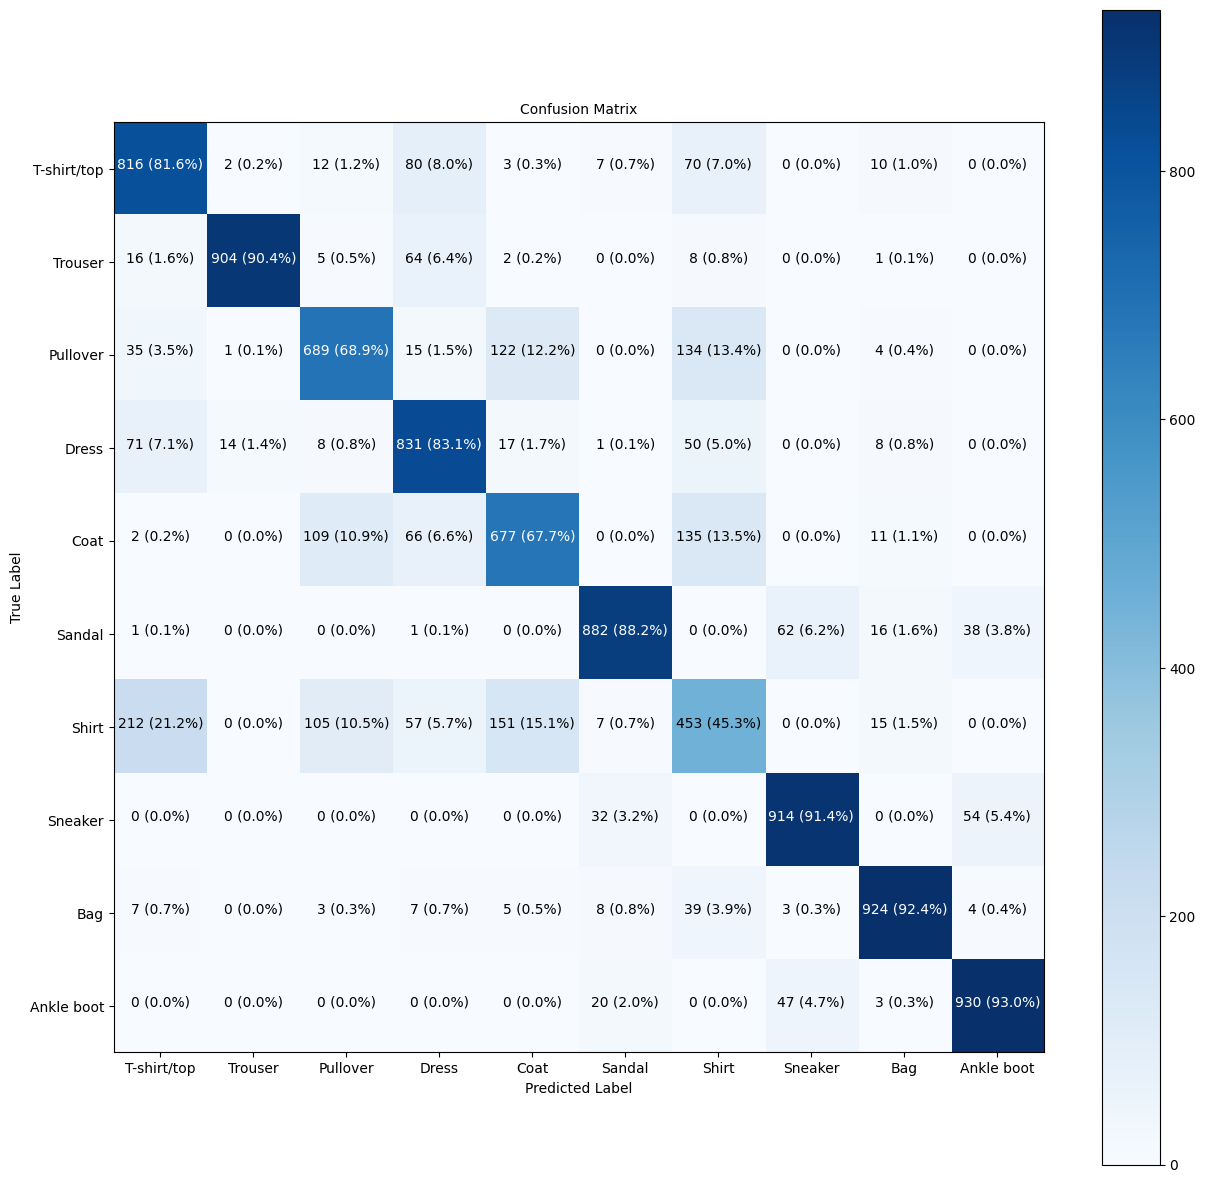

In [143]:
# Make a prettier confusion matrix
make_confusion_matrix(y_true=test_labels,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

> 🔑**NOte:** Often when working with images and other forms of visual data, it's a good idea to visualize as much as possible to develop a further understanding of the data and the inputs and outputs of your models.

How about we create a fun little function for:
* Plot a random image
* Make a prediction on said image
* Label the plot with the truth label & the predicted label

In [152]:


import random

# Create a function for plotting a random image along with its prediction
def plot_random_image(model, images, true_labels, classes):
  """Picks a random image, plots it and labels it with a predicted and truth label.

  Args:
    model: a trained model (trained on data similar to what's in images).
    images: a set of random images (in tensor form).
    true_labels: array of ground truth labels for images.
    classes: array of class names for images.

  Returns:
    A plot of a random image from `images` with a predicted class label from `model`
    as well as the truth class label from `true_labels`.
  """
  # Setup random integer
  i = random.randint(0, len(images))

  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28)) # have to reshape to get into right size for model
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the target image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) # set the color to green or red



1/1 [==============================] - 0s 116ms/step


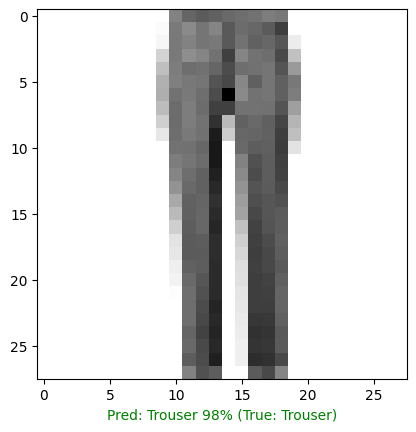

In [160]:
# Check out a random image as well as its prediction
plot_random_image(model=model_17,
                  images=test_data_norm, # always make predictions on the same kind of data your model was trained on
                  true_labels=test_labels,
                  classes=class_names)

## What pattens is our model learning?

In [162]:
# Find the layers of our most recent model
model_17.layers

In [163]:
# Extract a particular layer
model_17.layers[1]

In [164]:
# Get the patterns of a layer in our network
weights, biases = model_17.layers[1].get_weights()

# Shapes
weights, weights.shape

(array([[-0.5027415 ,  0.45985436, -0.10037807,  0.42406064],
        [-0.61860996, -0.27633768,  0.09662292, -0.97053355],
        [-0.08937239, -0.9466066 , -0.4978062 ,  0.20588124],
        ...,
        [-1.2151242 , -0.3834401 ,  0.01676692,  0.14941508],
        [-1.0848942 ,  0.16967751,  0.39250147,  0.19588135],
        [-1.0176612 , -0.5438716 , -0.35396537,  0.34700966]],
       dtype=float32),
 (784, 4))

In [165]:
model_17.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_11 (Flatten)        (None, 784)               0         
                                                                 
 dense_65 (Dense)            (None, 4)                 3140      
                                                                 
 dense_66 (Dense)            (None, 4)                 20        
                                                                 
 dense_67 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


Now let's check out the bias vector...

In [167]:
# Bias and biases shapes
biases, biases.shape

(array([1.9880724 , 0.85362244, 1.5627452 , 1.7197465 ], dtype=float32), (4,))

Wvery neuron has a bias vector. Each of these is paired with a weights matrix.

The bias vector get intitalized as zeros (at least in the case of a TensorFlow dense layer).

The bias vector dictates how much the patterns within the corresponding weights matrix should influence the next layers.

In [168]:
model_17.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_11 (Flatten)        (None, 784)               0         
                                                                 
 dense_65 (Dense)            (None, 4)                 3140      
                                                                 
 dense_66 (Dense)            (None, 4)                 20        
                                                                 
 dense_67 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


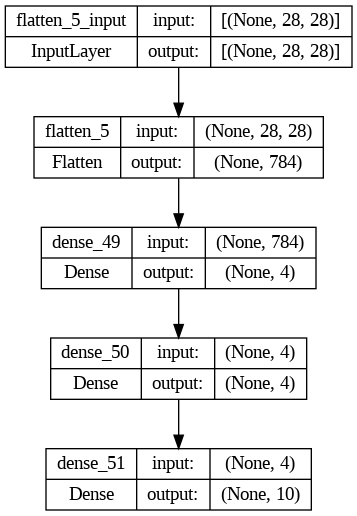

In [169]:
# Let's check our another way of viewing our deep learning models
from tensorflow.keras.utils import plot_model
# See the inputs and outputs of each layer
plot_model(model_14, show_shapes=True)